# Neural Network Regularized Logistic Regression

In [1]:
%pylab inline
from scipy.io import loadmat
import doctest

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
ex3data1 = loadmat('ex3data1.mat')
X, y = np.ascontiguousarray(ex3data1['X']), np.ascontiguousarray(ex3data1['y'])
# replace 10 class by 0
y[y[:,0] == 10, 0] = 0

## Plot Sample Data

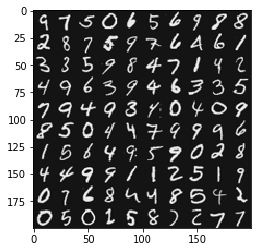

In [3]:
def plot_sample_data(X):
    X_copy = X.copy()
    np.random.shuffle(X_copy)
    img = np.reshape(X_copy[:100], (10,10,20,20)).transpose((0,3,1,2)).reshape((200,200))
    f = plt.imshow(img, cmap='gray');

plot_sample_data(X)

## Load Parameters

In [4]:
ex3weights = loadmat('./ex3weights.mat')
t1, t2 = ex3weights['Theta1'], ex3weights['Theta2']
# we swap rows 0 and 9 because of the indexation starting at 1 in matlab...
t2 = np.roll(t2, 1, axis=0)

## Insert Bias Feature

In [5]:
def insert_bias_feature(X):
    """Insert a column filled with ones in front of an unbiased array of features.
    
    The new column is inserted at index ``0`` on axis ``1``.
    
    Parameters
    ----------
    X : array_like
        Input array.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``
        before the new column insertion.
        
    Returns
    -------
    numpy.ndarray
        Output array.
        If `X` has ``(m,n)`` shape, the return value will have ``(m,n+1)``shape.
        
    Examples
    --------
    >>> x = np.array([[2,3],[4,5],[6,7]])
    >>> insert_bias_feature(x)
    array([[1, 2, 3],
           [1, 4, 5],
           [1, 6, 7]])
     
    >>> x = np.array([[2],[3],[4]])
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
     
    >>> x = [2,3,4]
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
    """
    if np.ndim(X) == 1:
        X = np.reshape(X, (-1,1))
        
    return np.insert(X,0,1,axis=1)

## Sigmoid Function

In [6]:
def sigmoid(z):
    '''Compute the sigmoid function.
    
    Parameters
    ----------
    z : array_like
        Input data.
        
    Returns
    -------
    numpy.ndarray
        Element-wise ``sigmoid(z)``, of the same shape and dtype as `x`.
        Returns scalar if `x` is a scalar.
        
    Examples
    --------
    >>> sigmoid(0)
    0.5
    
    >>> sigmoid([-1,1])
    array([0.26894142, 0.73105858])

    >>> sigmoid(np.array([-1,1e2]))
    array([0.26894142, 1.        ])
    '''
    return 1 / (1 + np.exp(np.negative(z)))

## Forward Propagation

In [7]:
def feed_forward(thetas, X):
    """Execute neural network Forward Propagation.
    
    Parameters
    ----------
    theta : array_like
        Parameters (weights) of the model, including the bias parameter.
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
        
    Returns
    -------
    activations : array_like
        Array filled with the network's activation layers,
        from input to output, both included.
    
    Examples
    --------
    >>> t1 = [[0.05,0.1,0.15,0.2],
    ...       [0.25,0.3,0.35,0.4],
    ...       [0.45,0.5,0.55,0.6]]
    >>> t2 = [[0.05,0.1,0.15,0.2],
    ...       [0.25,0.3,0.35,0.4]]
    >>> x = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
    >>> print(feed_forward([t1,t2],x))
    [[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], array([[0.7407749 , 0.92056145, 0.97916366],
           [0.9168273 , 0.99631576, 0.99984929],
           [0.97702263, 0.99984156, 0.99999893],
           [0.9939402 , 0.99999321, 0.99999999]]), array([[0.61253829, 0.76604183],
           [0.62036552, 0.7813752 ],
           [0.62191356, 0.78466314],
           [0.62231667, 0.78552847]])]
    """ 
    a = X
    activations = []
    activations.append(a)
    for i,t in enumerate(thetas):
        a_biased = insert_bias_feature(a)
        z = a_biased @ np.transpose(t)
        a = sigmoid(z)
        activations.append(a)
    return activations

In [8]:
def make_predictions(thetas, X, y):
    output = feed_forward(thetas,X)[-1]
    predictions =  output.argmax(axis=1)
    accuracy = np.mean(predictions == y[:,0])
    print(f'The network has an accuracy of {accuracy * 100}%')

make_predictions([t1,t2],X,y)

The network has an accuracy of 97.52%


## Unit Tests

In [9]:
doctest.testmod()

TestResults(failed=0, attempted=13)

In [10]:
# set the file name (required)
__file__ = 'ex3_nn.ipynb'

# add ipython magics
import ipytest.magics
import pytest

In [11]:
%%run_pytest[clean] -qq -v

def test_insert_bias_feature():
    ipytest.assert_equals(insert_bias_feature([[2,3], [4,5], [6,7]]),
                          np.array([[1, 2, 3], [1, 4, 5], [1, 6, 7]]))
    ipytest.assert_equals(insert_bias_feature(np.array([[2],[3],[4]])),
                          np.array([[1, 2], [1, 3], [1, 4]]))
    ipytest.assert_equals(insert_bias_feature([2,3,4]),
                          np.array([[1, 2], [1, 3], [1, 4]]))
    
def test_sigmoid():
    ipytest.assert_equals(sigmoid(0), 0.5)
    ipytest.assert_equals(sigmoid([-1,1]), np.array([0.26894142, 0.73105858]))
    ipytest.assert_equals(sigmoid(np.array([-1,1e2])), np.array([0.26894142, 1.]))

def test_feed_forward():
    a1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
    a2 = np.array([[0.7407749 , 0.92056145, 0.97916366],
                   [0.9168273 , 0.99631576, 0.99984929],
                   [0.97702263, 0.99984156, 0.99999893],
                   [0.9939402 , 0.99999321, 0.99999999]])
    a3 = np.array([[0.61253829, 0.76604183],
                   [0.62036552, 0.7813752 ],
                   [0.62191356, 0.78466314],
                   [0.62231667, 0.78552847]])
    b1,b2,b3 = feed_forward([[[0.05,0.1,0.15,0.2],
                   [0.25,0.3,0.35,0.4],
                   [0.45,0.5,0.55,0.6]],
                  [[0.05,0.1,0.15,0.2],
                   [0.25,0.3,0.35,0.4]]],
                 [[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
    ipytest.assert_equals(b1, a1)
    ipytest.assert_equals(b2, a2)
    ipytest.assert_equals(b3, a3)

...                                                                                                                                                                                                  [100%]
3 passed in 0.05 seconds
